# Install necessary packages

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


# code

### Overview of the Script

This notebook contains a script that uses the `ultralytics` library to perform object tracking and segmentation on a video. Here’s a quick overview of what the code does:

#### Imports Libraries:
- **logging**: Manages messages and errors.
- **collections**: Provides the `defaultdict` for storing tracking history.
- **cv2**: Handles video processing.
- **ultralytics**: Loads and uses the YOLOv8 model for tracking and segmentation.
- **ultralytics.utils.plotting**: Provides tools for annotating frames with bounding boxes and masks.

#### Defines Functions:
- **load_model(model_path)**: Loads the YOLOv8 model from the specified path.
- **process_frame(model, frame)**: Processes each video frame to detect, track, and annotate objects with bounding boxes and segmentation masks.
- **main(video_path, model_path, output_path)**: Manages the overall workflow, including loading the video and model, processing each frame, and saving the annotated video.

#### Main Function:
- **main()**:
  - Collects paths for the input video, model, and output video.
  - Loads the YOLOv8 model.
  - Opens the video file and initializes the video writer for the output.
  - Processes each frame of the video to detect and annotate objects.
  - Writes the annotated frames to the output video file.

### How to Use the Notebook

#### Run the Notebook:
- Execute the cells to run the script.
- In Google Colab or Jupyter Notebook, click 'Run' or press Shift + Enter.

#### Provide Information:
- **Paths**: Specify the paths for the input video, YOLOv8 model, and the output video file.
  - Example paths:
    - `video_path = "/content/input_video_.mp4"`
    - `model_path = "yolov8n-seg.pt"`
    - `output_path = "/content/output_video.avi"`

#### See the Result:
- The annotated video will be saved to the specified output path.
- You can view the video with the detected and tracked objects, each annotated with bounding boxes and segmentation masks.

By following these steps, you can use the notebook to perform object tracking and segmentation on your video files, leveraging the powerful capabilities of the YOLOv8 model from the `ultralytics` library.


WARNING ⚠️ NMS time limit 2.050s exceeded
0: 384x640 2 persons, 291.6ms
Speed: 4.1ms preprocess, 291.6ms inference, 2206.9ms postprocess per image at shape (1, 3, 384, 640)


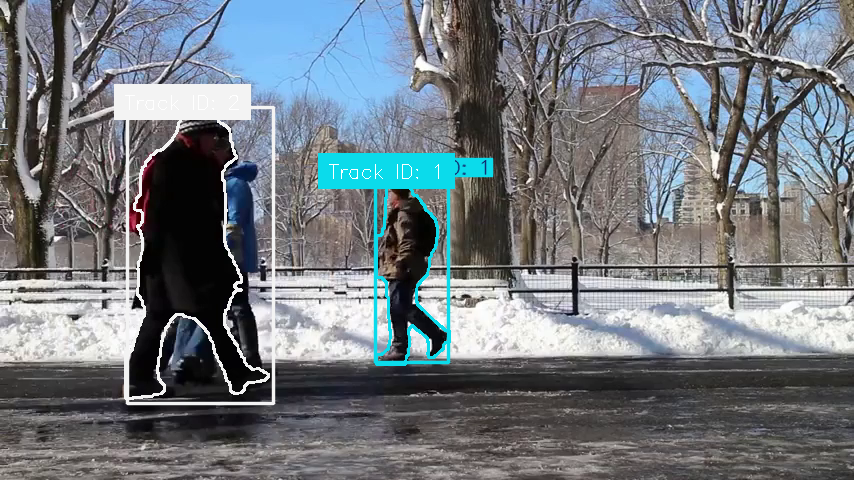


0: 384x640 2 persons, 71.9ms
Speed: 2.7ms preprocess, 71.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


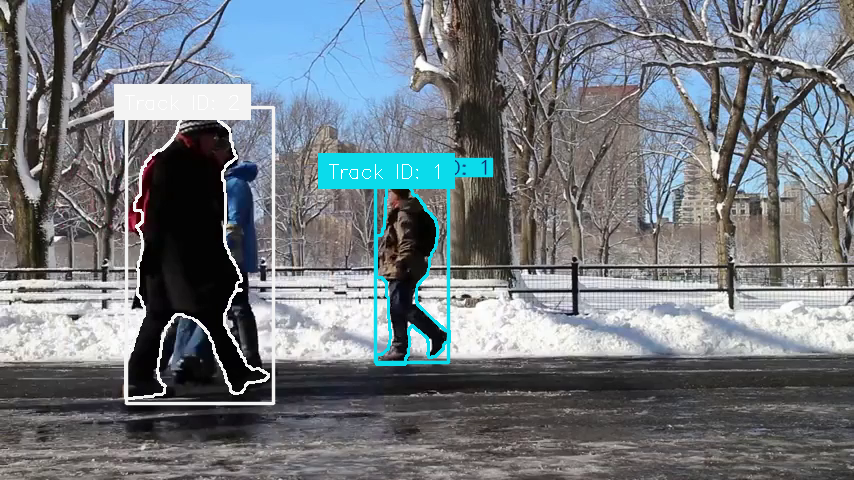


0: 384x640 2 persons, 45.7ms
Speed: 8.0ms preprocess, 45.7ms inference, 22.3ms postprocess per image at shape (1, 3, 384, 640)


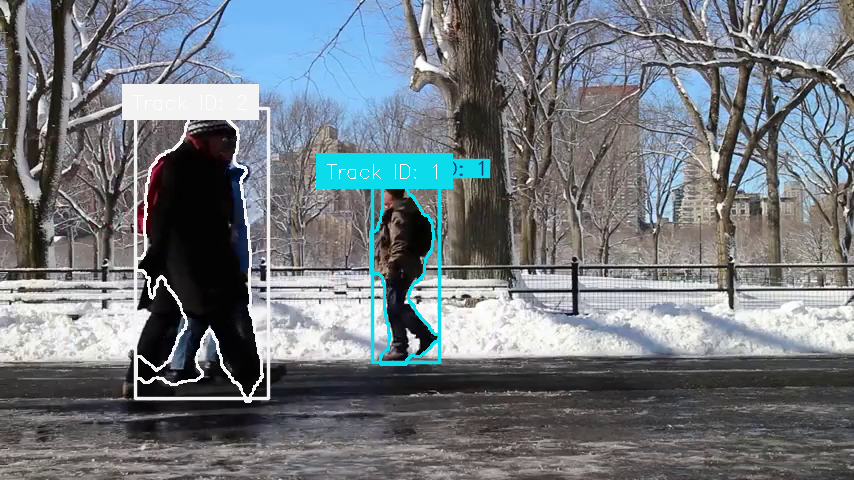


0: 384x640 2 persons, 29.2ms
Speed: 4.2ms preprocess, 29.2ms inference, 7.8ms postprocess per image at shape (1, 3, 384, 640)


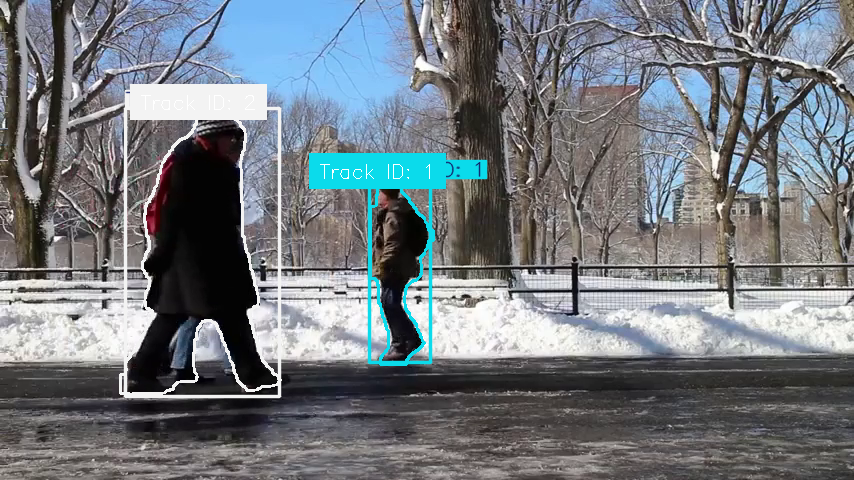


0: 384x640 2 persons, 32.4ms
Speed: 2.7ms preprocess, 32.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


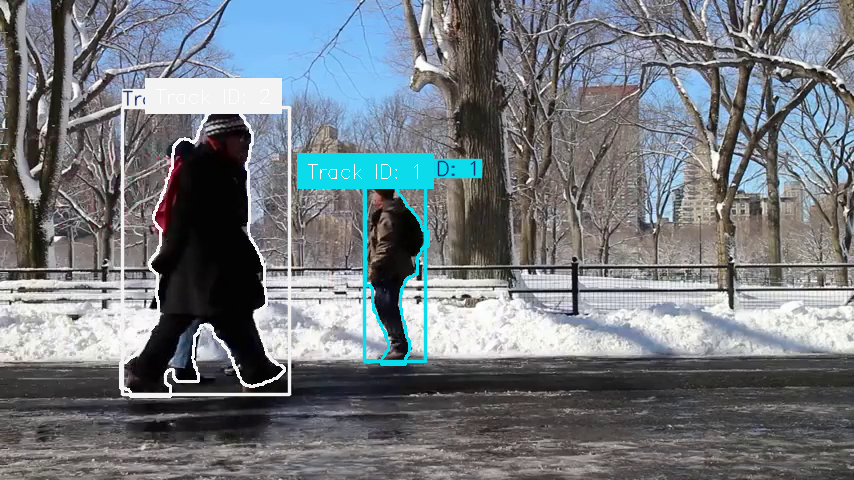


0: 384x640 2 persons, 20.9ms
Speed: 8.0ms preprocess, 20.9ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)



KeyboardInterrupt



In [1]:
# Import necessary libraries
import logging
from collections import defaultdict
import cv2
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator, colors
from google.colab.patches import cv2_imshow

# Initialize logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Dictionary to store tracking history with default empty lists
track_history = defaultdict(lambda: [])

# Function to load the YOLO model
def load_model(model_path):
    try:
        model = YOLO(model_path)
        logging.info("Model loaded successfully.")
        return model
    except Exception as e:
        logging.error(f"Error loading model: {e}")
        raise

# Function to process each frame of the video
def process_frame(model, frame):
    try:
        annotator = Annotator(frame, line_width=2)
        results = model.track(frame, persist=True)
        if results[0].boxes.id is not None and results[0].masks is not None:
            masks = results[0].masks.xy
            track_ids = results[0].boxes.id.int().cpu().tolist()
            bboxes = results[0].boxes.xyxy.int().cpu().tolist()
            for bbox, mask, track_id in zip(bboxes, masks, track_ids):
                label = f"Track ID: {track_id}"
                annotator.box_label(bbox, label, color=colors(track_id, True))
                annotator.seg_bbox(mask=mask, mask_color=colors(track_id, True), track_label=str(track_id))
        return annotator.result()
    except Exception as e:
        logging.error(f"Error processing frame: {e}")
        return frame

# Main function to process the video and save the output
def main(video_path, model_path, output_path):
    model = load_model(model_path)
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        logging.error("Error: Could not open video.")
        return

    w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*"MJPG"), fps, (w, h))

    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                logging.info("Video frame is empty or video processing has been successfully completed.")
                break
            annotated_frame = process_frame(model, frame)
            out.write(annotated_frame)
            cv2_imshow(annotated_frame)
            if cv2.waitKey(1) & 0xFF == ord("q"):
                break
    finally:
        out.release()
        cap.release()
        cv2.destroyAllWindows()

# Execute the main function
if __name__ == "__main__":
    # Define the paths for the input video, model, and output video
    video_path = "/content/input_video_.mp4"  # Path of the input video
    model_path = "yolov8n-seg.pt"  # Path of the YOLOv8 segmentation model
    output_path = "/content/output_video.avi"  # Path to save the annotated output video
    main(video_path, model_path, output_path)